In [1]:
# pip install tensorflow


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
import matplotlib.pyplot as plt

Load and Preprocess the Data

In [3]:
# Set parameters
max_features = 10000  # Number of words to consider as features
maxlen = 500         # Cut texts after this number of words (among top max_features most common words)
batch_size = 32


In [4]:
# Load the data
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


Build the RNN Model

In [5]:
model = Sequential()
model.add(Embedding(max_features, 128,))
model.add(SimpleRNN(128))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


Train the Model

In [6]:
print('Training model...')
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=5,validation_split=0.2)

Training model...
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 117s 183ms/step - accuracy: 0.5459 - loss: 0.6818 - val_accuracy: 0.6248 - val_loss: 0.6284
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 109s 174ms/step - accuracy: 0.6967 - loss: 0.5766 - val_accuracy: 0.7252 - val_loss: 0.5477
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 166ms/step - accuracy: 0.7774 - loss: 0.4691 - val_accuracy: 0.7504 - val_loss: 0.5320
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 107s 171ms/step - accuracy: 0.8341 - loss: 0.3765 - val_accuracy: 0.6034 - val_loss: 0.7144
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 113s 181ms/step - accuracy: 0.7272 - loss: 0.5314 - val_accuracy: 0.6304 - val_loss: 0.6376


Evaluate the Model

In [7]:
print('Evaluate model...')
score = model.evaluate(x_test, y_test,batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Evaluate model...
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.6295 - loss: 0.6440
Test loss: 0.6364988684654236
Test accuracy: 0.6304799914360046


Plot Training History

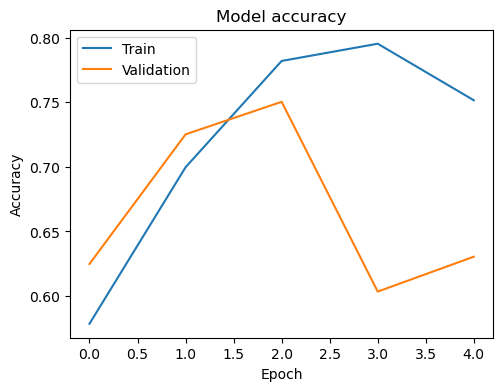

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


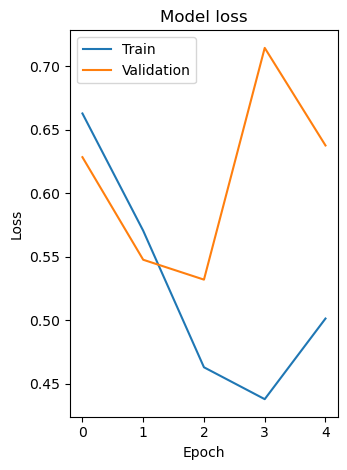

In [9]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
